In [3]:
# Task 1: ETL Pipeline for Personality Dataset

#Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

#Step 2: Extract - Load the CSV
df = pd.read_csv('/content/personality_dataset.csv')  # Adjust path if needed
print("Dataset loaded successfully!")
print(df.head())

#Step 3: Explore
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

#Step 4: Transform - Cleaning & Preprocessing

#Drop duplicate rows if any
df.drop_duplicates(inplace=True)

#Fill missing values
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

#Encode categorical features
label_encoders = {}
for column in df_imputed.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_imputed[column] = le.fit_transform(df_imputed[column])
    label_encoders[column] = le

#Feature Scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

print("\n Data cleaned and transformed successfully!")

#Step 5: Load - Save to a new CSV
df_scaled.to_csv('/content/personality_dataset_cleaned.csv', index=False)
print("Cleaned dataset saved as 'personality_dataset_cleaned.csv'")


Dataset loaded successfully!
   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>

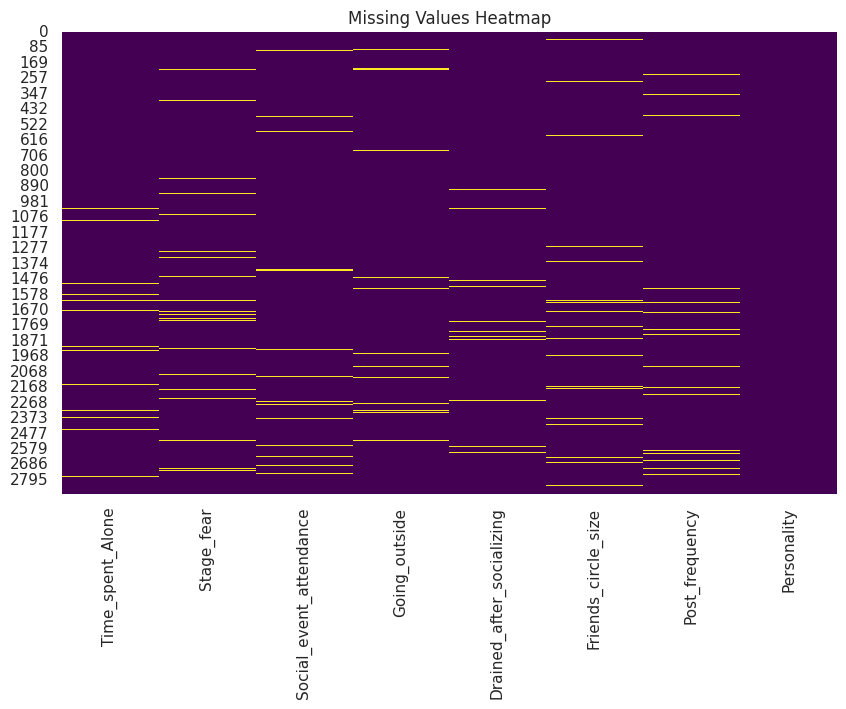

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

#1. Missing Values Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


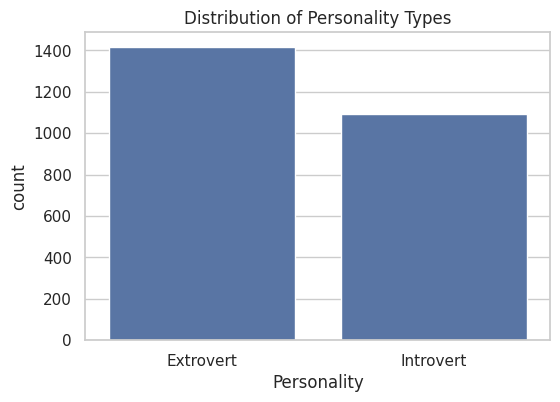

In [5]:
#2. Count Plot of Target Variable (Adjust column name if needed)
if 'Personality' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Personality', data=df)
    plt.title("Distribution of Personality Types")
    plt.show()



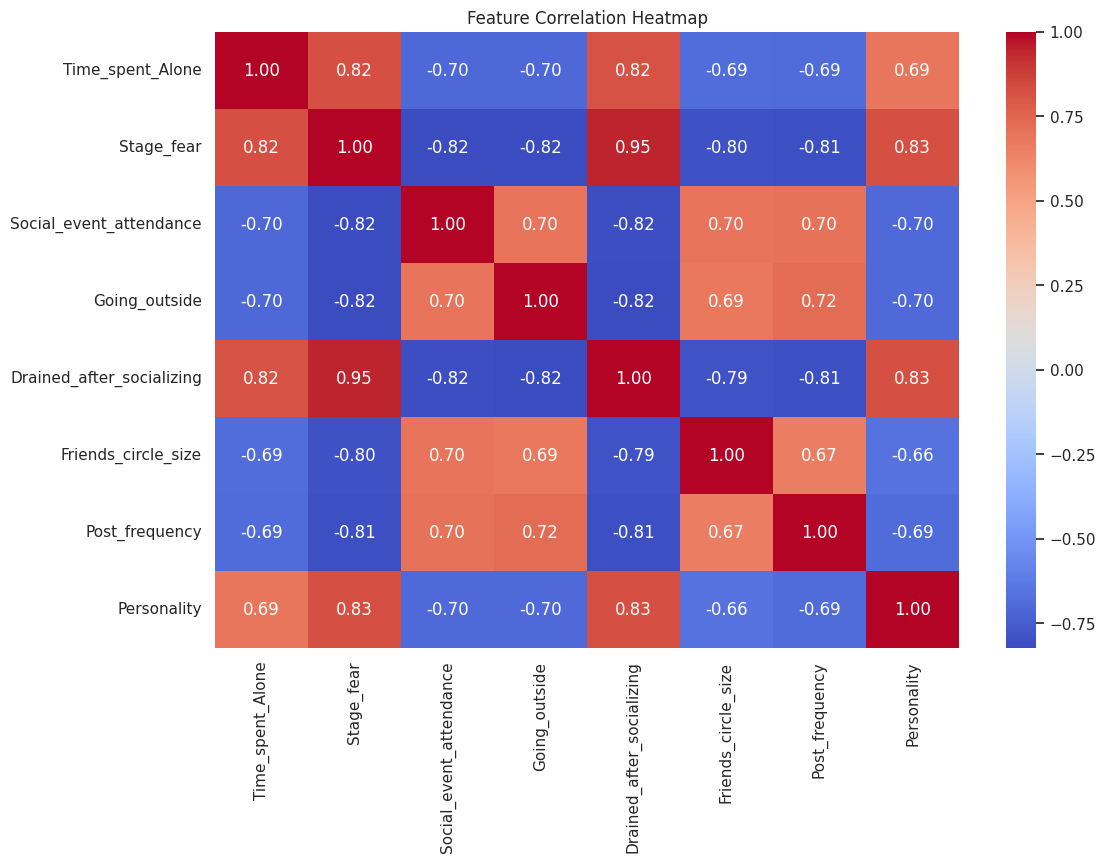

In [6]:
#3. Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df_imputed.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



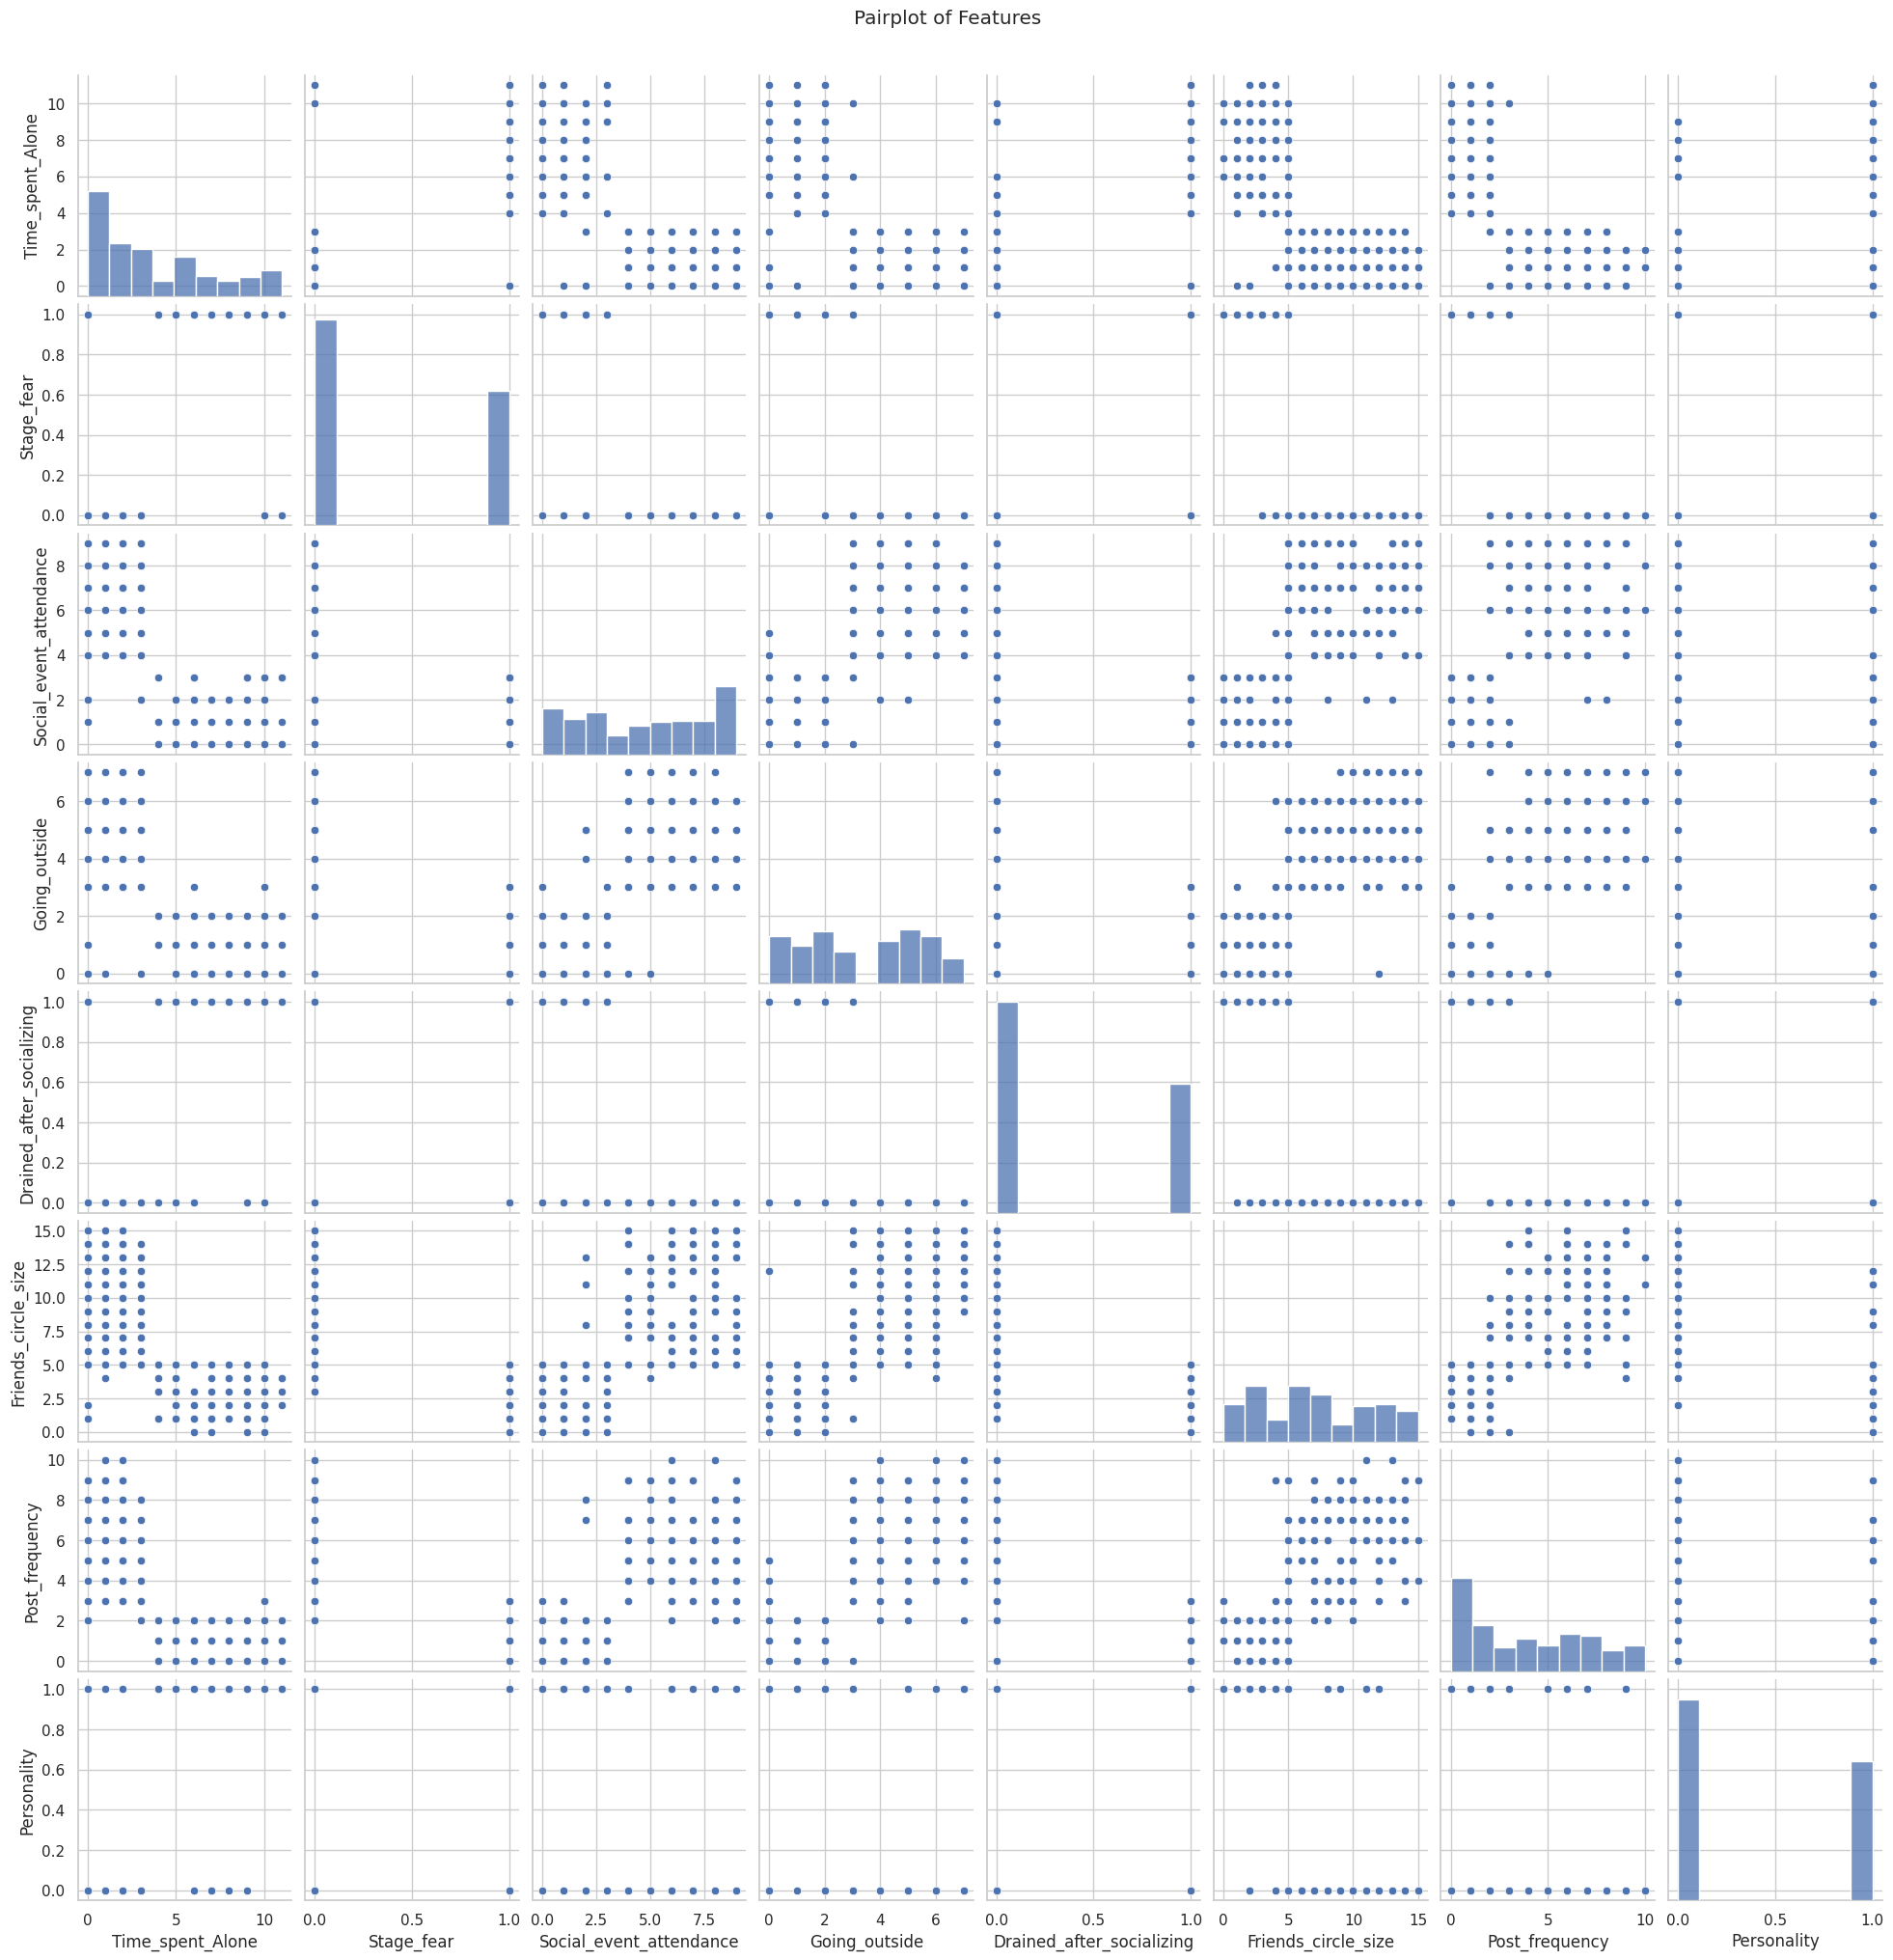

In [7]:
#4. Pairplot (only if dataset isn't too large)
sample_df = df_imputed.sample(n=200) if df_imputed.shape[0] > 200 else df_imputed
sns.pairplot(sample_df)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()



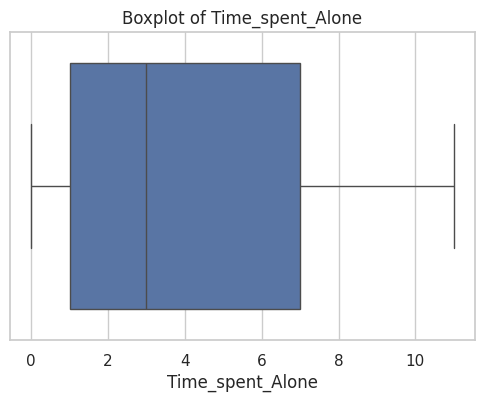

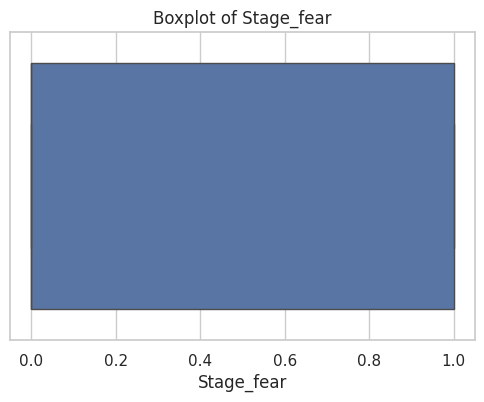

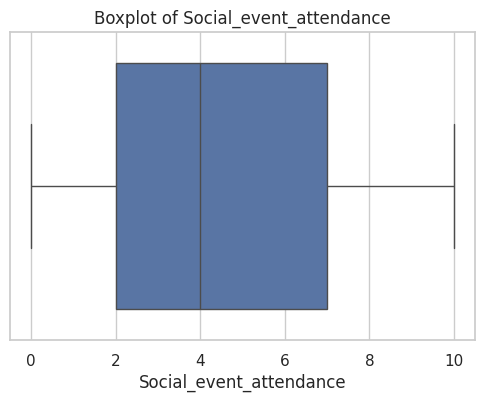

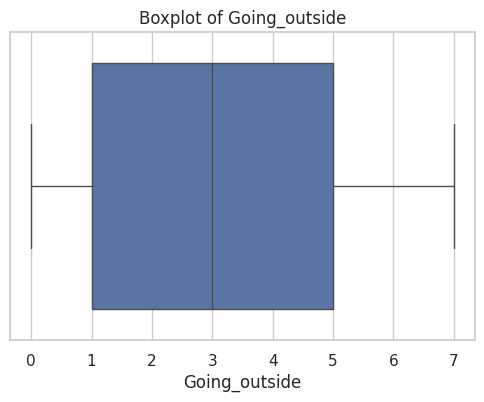

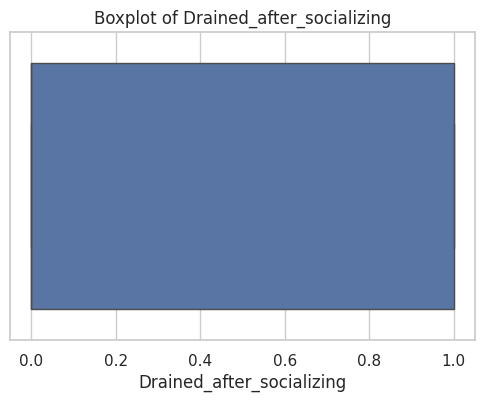

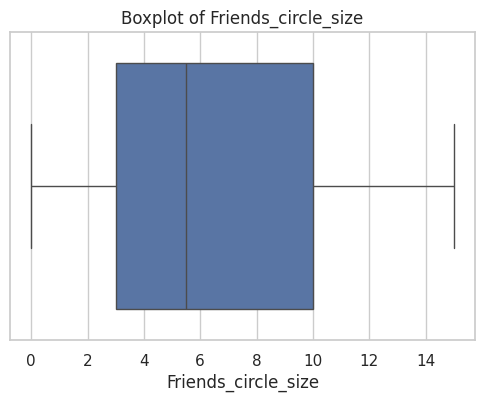

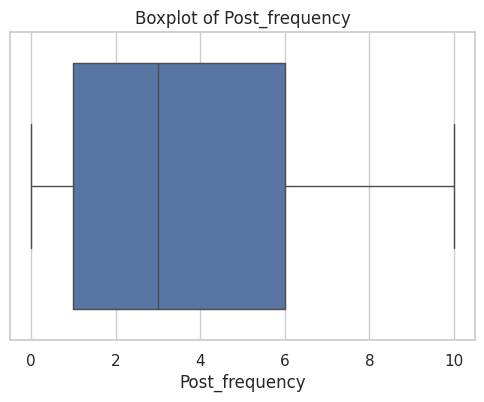

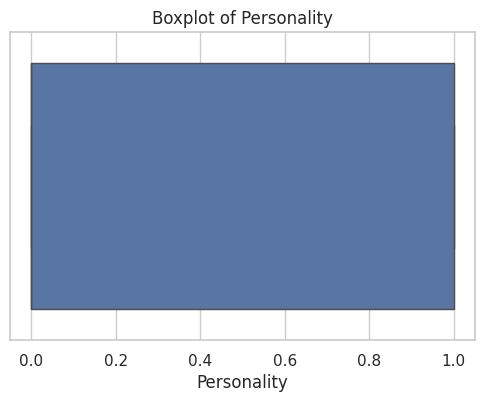

In [8]:
#5. Boxplots for numerical features
numerical_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_imputed[col])
    plt.title(f"Boxplot of {col}")
    plt.show()



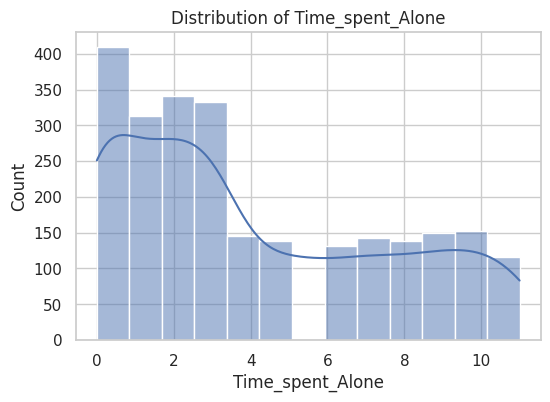

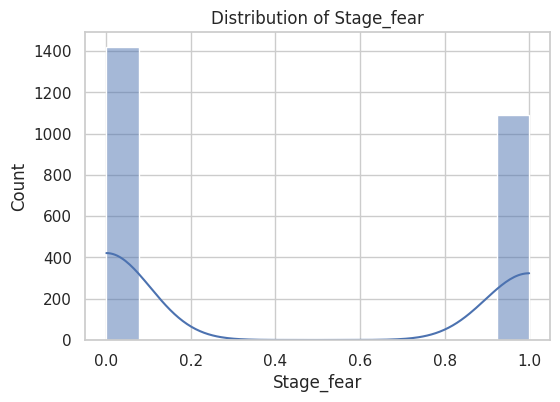

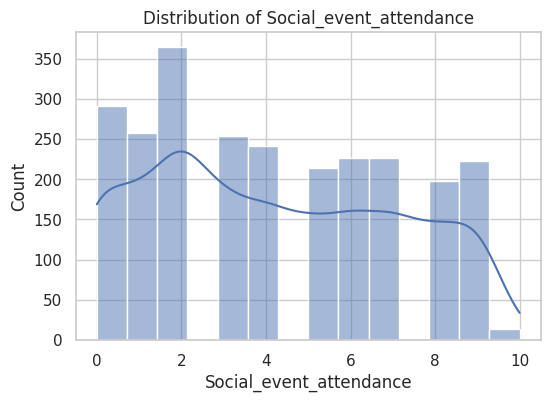

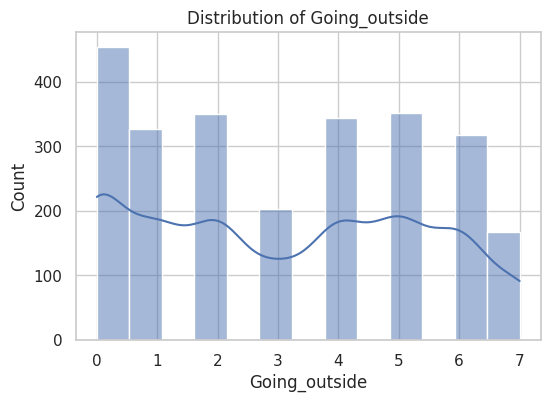

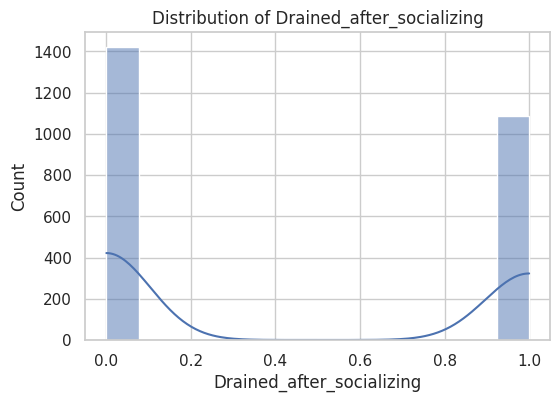

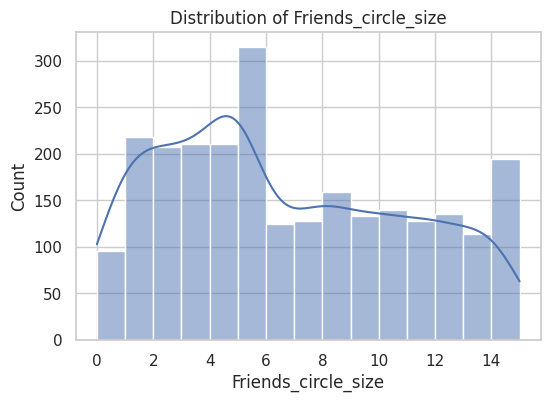

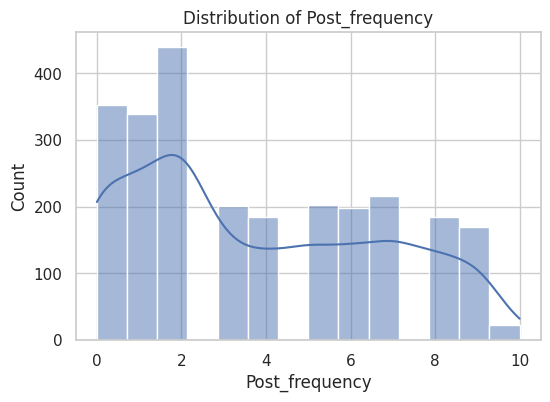

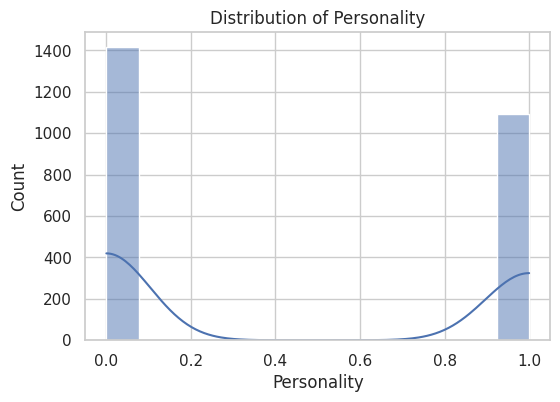

In [9]:
#6. Distribution Plots
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_imputed[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

